In [2]:
import pandas as pd

In [3]:
pd.options.display.max_columns = None # type: ignore

In [4]:
data = pd.read_csv("Cleaned_Dataset.csv")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,1,0,1,0,0,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,3,0,0,1,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,3,0,1,0,0,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,1,0,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,0,0,1,0,0,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## With Vs Without Feature Scaling

The title basically says it all. I'm going to cluster the data, 1st **without** Feature Scaling, then **with** Feature Scaling. To see how much of a positive impact there is on the results.

In [5]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

### Model Training (Without Scaling)

In [6]:
# Choosing relevant features

marital_statuses = ["Marital_Status_Divorced", "Marital_Status_Married", 
                    "Marital_Status_Single", "Marital_Status_Unknown"]

demographics_features = ["Customer_Age", "Gender", "Dependent_count", 
                         "Education_Level", "Income_Category"]
demographics_features += marital_statuses

# Credit Card Usage
ccu_features = ["Card_Category","Months_on_book","Total_Revolving_Bal",
                "Avg_Open_To_Buy","Total_Trans_Amt","Total_Trans_Ct",
                "Avg_Utilization_Ratio"]

selected_features = demographics_features + ccu_features

In [7]:
# Elbow Method

k_range = [n for n in range(1, 11)]
wcss_list = []
for k in k_range:
    kMeans = cluster.KMeans(k).fit(data[selected_features])
    wcss = kMeans.inertia_ # Within-Cluster Sum of Squares (WCSS)
    wcss_list.append(wcss)

In [8]:
wcss_list

[811656146581.2452,
 268152537951.92932,
 172665409077.4449,
 119790019691.99803,
 104774131497.08737,
 75344946393.30371,
 63647290781.90195,
 56811829481.66987,
 44458702505.69307,
 39215614900.99886]

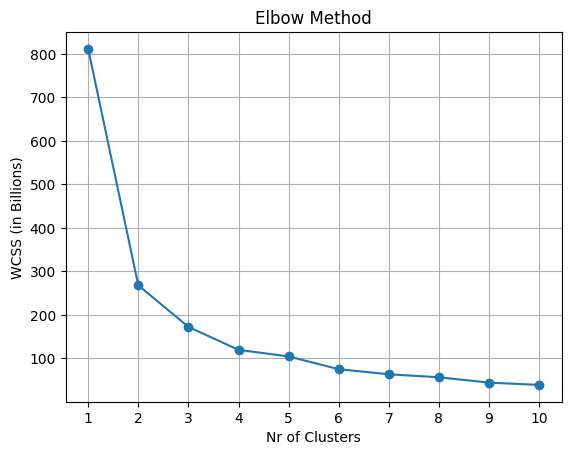

In [9]:
from matplotlib.ticker import FuncFormatter

def billions_formatter(val, tick):
  return f"{val / 1e9:.0f}"

fig, ax = plt.subplots()

ax.plot(k_range, wcss_list, marker="o")
ax.set_ylabel("WCSS (in Billions)")
ax.set_xlabel("Nr of Clusters")
ax.set_title("Elbow Method")
ax.set_xticks(k_range)
ax.grid()

ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.show()

Based on the graph, The optimal number of clusters is **2**.

In [10]:
import sklearn.metrics as metrics

In [57]:
# Silhouette Coefficient/Score

k_range = [n for n in range(2, 11)]
sil_scores = []
df_labelSets = pd.DataFrame()

for k in k_range:
    labels = cluster.KMeans(k,random_state=0).fit(data[selected_features]).labels_
    sil_score = metrics.silhouette_score(data[selected_features], labels, random_state=0) 
    print ("Silhouette score for {} clusters is {}".format(k,sil_score))

    sil_scores.append(sil_score)
    df_labelSets.insert(len(df_labelSets.columns), str(k), labels)

    

Silhouette score for 2 clusters is 0.6775367543325725
Silhouette score for 3 clusters is 0.5626411522865528
Silhouette score for 4 clusters is 0.6045495351783402
Silhouette score for 5 clusters is 0.5240880598627613
Silhouette score for 6 clusters is 0.46030579660133353
Silhouette score for 7 clusters is 0.4662117362866638
Silhouette score for 8 clusters is 0.47724622171929876
Silhouette score for 9 clusters is 0.471325740132178
Silhouette score for 10 clusters is 0.4173749269682986


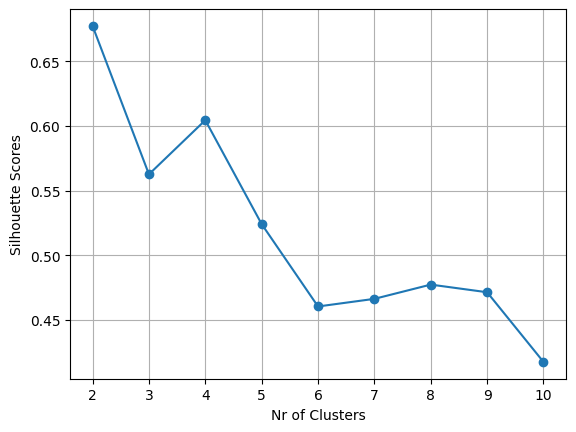

In [58]:
fig, ax = plt.subplots()

ax.plot(k_range, sil_scores, marker="o")
ax.set_ylabel("Silhouette Scores")
ax.set_xlabel("Nr of Clusters")
ax.grid()

plt.show()

In [61]:
data.insert(len(data.columns), "Clusters", df_labelSets["2"])

In [64]:
data[selected_features].head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,45,1,3,1,2,0,1,0,0,0,39,777,11914.0,1144,42,0.061
1,49,0,5,3,0,0,0,1,0,0,44,864,7392.0,1291,33,0.105
2,51,1,3,3,3,0,1,0,0,0,36,0,3418.0,1887,20,0.000
3,40,0,4,1,0,0,0,0,1,0,34,2517,796.0,1171,20,0.760
4,40,1,3,0,2,0,1,0,0,0,21,0,4716.0,816,28,0.000


In [14]:
data[["Customer_Age", "Total_Trans_Ct"]].agg(["min", "max"])

,Customer_Age,Total_Trans_Ct
min,26,11
max,73,139


In [15]:
data[["Dependent_count", "Total_Revolving_Bal"]].agg(["min", "max"])

,Dependent_count,Total_Revolving_Bal
min,0,0
max,5,2517


In [16]:
data[["Card_Category", "Avg_Utilization_Ratio"]].agg(["min", "max"])

,Card_Category,Avg_Utilization_Ratio
min,0,0.000
max,3,0.994


In [26]:
import random

def jitter(data, amount=0.1):
  jittered_data = []
  for value in data:
    jittered_value = value + random.uniform(-amount, amount)
    jittered_data.append(jittered_value)
  return jittered_data

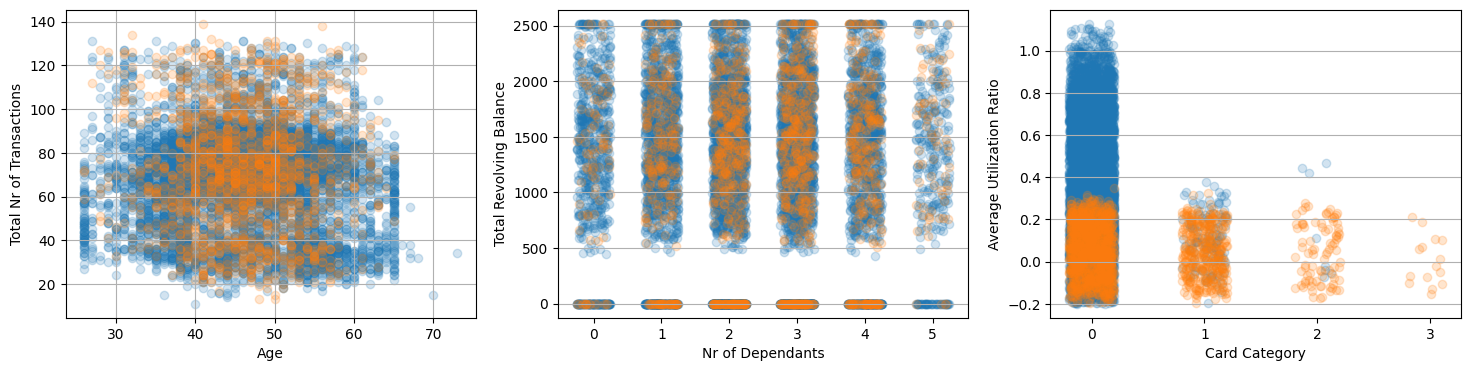

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

ALPHA = 0.2

ax[0].scatter(data.query("Clusters == 0")["Customer_Age"], 
              data.query("Clusters == 0")["Total_Trans_Ct"], alpha=ALPHA)
ax[0].scatter(data.query("Clusters == 1")["Customer_Age"], 
              data.query("Clusters == 1")["Total_Trans_Ct"], alpha=ALPHA)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Total Nr of Transactions")
ax[0].grid()

JITTER_AMOUNT_1 = 0.25
jittered_x_1 = jitter(data.query("Clusters == 0")["Dependent_count"], amount=JITTER_AMOUNT_1)
jittered_y_1 = jitter(data.query("Clusters == 0")["Total_Revolving_Bal"], amount=JITTER_AMOUNT_1)
jittered_x_2 = jitter(data.query("Clusters == 1")["Dependent_count"], amount=JITTER_AMOUNT_1)
jittered_y_2 = jitter(data.query("Clusters == 1")["Total_Revolving_Bal"], amount=JITTER_AMOUNT_1)

ax[1].scatter(jittered_x_1, jittered_y_1, alpha=ALPHA)
ax[1].scatter(jittered_x_2, jittered_y_2, alpha=ALPHA)
ax[1].set_xlabel("Nr of Dependants")
ax[1].set_ylabel("Total Revolving Balance")
ax[1].grid(axis="y")

JITTER_AMOUNT_2 = 0.2
jittered_x_1 = jitter(data.query("Clusters == 0")["Card_Category"], amount=JITTER_AMOUNT_2)
jittered_y_1 = jitter(data.query("Clusters == 0")["Avg_Utilization_Ratio"], amount=JITTER_AMOUNT_2)
jittered_x_2 = jitter(data.query("Clusters == 1")["Card_Category"], amount=JITTER_AMOUNT_2)
jittered_y_2 = jitter(data.query("Clusters == 1")["Avg_Utilization_Ratio"], amount=JITTER_AMOUNT_2)


ax[2].scatter(jittered_x_1, jittered_y_1, alpha=ALPHA)
ax[2].scatter(jittered_x_2, jittered_y_2, alpha=ALPHA)
ax[2].set_xlabel("Card Category")
ax[2].set_ylabel("Average Utilization Ratio")
ax[2].set_xticks([0, 1, 2, 3])
ax[2].grid(axis="y")

plt.show()